<b>¡Hola Carlos!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!


## Inicialización

In [1]:
import pandas as pd
import numpy as np  

import matplotlib.pyplot as plt 

from tensorflow.keras.preprocessing.image import ImageDataGenerator 

## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/` 
- La carpeta `final_files` con 7600 fotos 
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age` 
Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Has configurado correctamente el generador de datos de imágenes con `ImageDataGenerator`, incluyendo la normalización de las imágenes con `rescale=1./255`. Esto es crucial para asegurar que los valores de los píxeles estén en el rango adecuado para el modelo. Este paso es fundamental para el correcto funcionamiento de los modelos de aprendizaje profundo, que generalmente esperan entradas normalizadas.
</div>


## EDA

In [4]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [5]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


<div class="alert alert-block alert-success">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
El uso de `info()` para revisar la estructura del DataFrame es una buena práctica. Has confirmado que no hay valores nulos en tus datos, lo cual es importante para evitar problemas durante el entrenamiento del modelo. Asegurarte de que tus datos estén completos y sin valores faltantes es esencial para la estabilidad y precisión del modelo.
</div>


In [6]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


<div class="alert alert-block alert-success">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
Aunque `describe()` proporciona un resumen estadístico útil, la visualización la distribución de edades para entender mejor la variabilidad y posibles sesgos en los datos es aún mejor. Así puedes identificar si ciertas edades están subrepresentadas, lo que podría afectar el rendimiento del modelo.
</div>


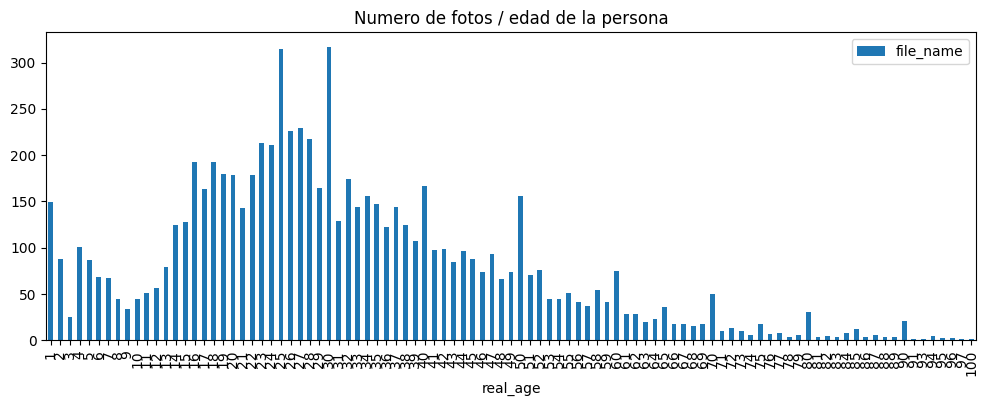

In [7]:
# Numero de fotos / edad de la persona
labels.groupby('real_age').count().plot(kind='bar',figsize=(12,4))
plt.title('Numero de fotos / edad de la persona')
plt.show()

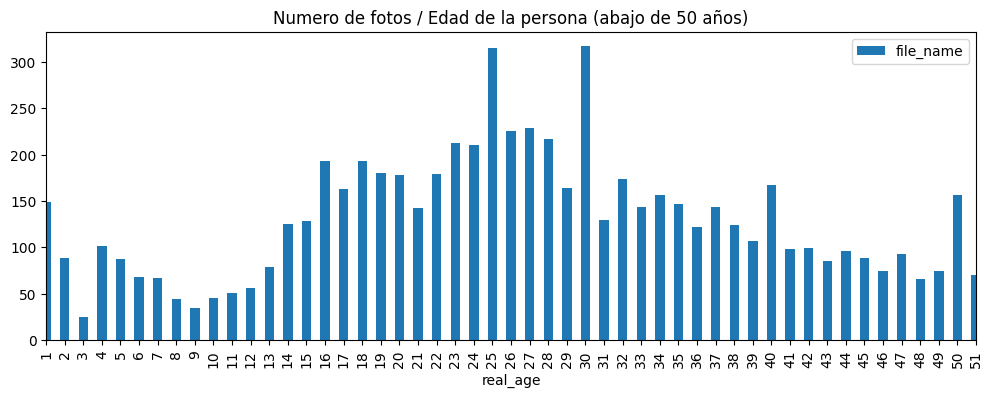

In [8]:
# Numero de fotos / Edad de la persona (abajo de 50 años)
labels.groupby('real_age').count().plot(kind='bar',figsize=(12,4))
plt.title('Numero de fotos / Edad de la persona (abajo de 50 años)')
plt.xlim(0, 50) 
plt.show()

- La edad minima y maxima son de 1 y 100 respectivamente.
- El promedio de edad es de 31 años.
- 25% de los datos es de gente abajo de 20 años.
- 75% de los datos es de gente abajo de 41 años.

In [9]:
features, target = next(train_gen_flow) 

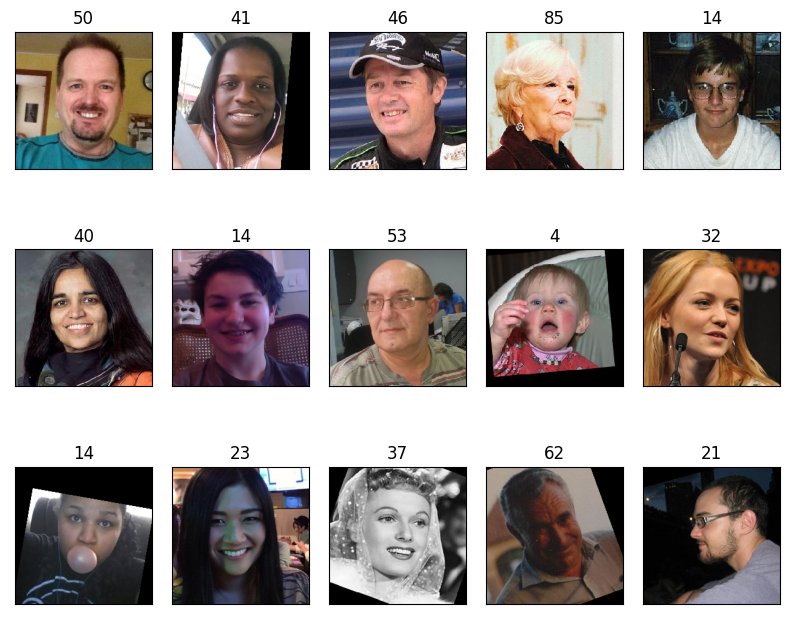

In [10]:
# Preview de 15 imagenes
fig = plt.figure(figsize=(8,8)) 

for i in range(15): 
    fig.add_subplot(3, 5, i+1) 
    plt.imshow(features[i]) 
    plt.title(target[i])
    
    # Remover ejes y poner imagenes mas cercanas
    plt.xticks([]) 
    plt.yticks([]) 
    plt.tight_layout() 

<div class="alert alert-block alert-success">
<b>Celda [10]</b> <a class="tocSkip"></a><br>
La visualización de un conjunto de imágenes con sus respectivas edades es una excelente manera de verificar visualmente que el preprocesamiento de datos se ha realizado correctamente. Esto también ayuda a asegurar que las imágenes están siendo cargadas y etiquetadas adecuadamente, lo cual es crucial para el éxito del entrenamiento del modelo.
</div>


### Conclusiones

El objetivo es no venderle alcohol a menores de edad, lamentablemente solo contamos con 25% de los datos
que representan a este sector (menores de edad). 

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crea un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [11]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [12]:
def load_train(path):
    
    """
    Carga la parte de entrenamiento del conjunto de datos desde la ruta.
    """
    
    #load data - labels
    labels = pd.read_csv(path + 'labels.csv')
    
    #load data - images
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=(path +'final_files/'),
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345) 

    return train_gen_flow

<div class="alert alert-block alert-warning">
<b>Celda [12]</b> <a class="tocSkip"></a><br>
En la función `load_train`, estás utilizando `validation_split=0.25`. Asegúrate de que esto sea consistente con tu estrategia de validación y que el conjunto de validación sea representativo. Considera documentar este paso para clarificar su propósito, ya que una división adecuada es clave para evaluar correctamente el rendimiento del modelo.
</div>


In [13]:
def load_test(path):
    
    """
    Carga la parte de validación/prueba del conjunto de datos desde la ruta
    """
    
    #load data - labels
    labels = pd.read_csv(path + 'labels.csv')
    
    #load data - images
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    
    test_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=(path +'final_files/'),
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)  

    return test_gen_flow

In [14]:
def create_model(input_shape):
    
    """
    Define el modelo
    """
    backbone = ResNet50(
        input_shape=input_shape, 
        weights='imagenet', 
        include_top=False)
    
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    
    #1 output neuron, only age is expected
    model.add(Dense(1, activation='relu'))
    
    model.compile(
        optimizer=Adam(learning_rate=0.0001), 
        loss="mean_squared_error", 
        metrics=["mae"])

    return model

<div class="alert alert-block alert-success">
<b>Celda [14]</b> <a class="tocSkip"></a><br>
Has definido adecuadamente el modelo usando ResNet50 como backbone. La elección de `GlobalAveragePooling2D` es acertada para reducir la dimensionalidad de las características extraídas por la red convolucional. Esta técnica ayuda a evitar el sobreajuste y reduce la cantidad de parámetros, lo que puede mejorar la eficiencia del modelo.
</div>


In [15]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Entrena el modelo dados los parámetros
    """
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    
    model.fit( train_data, 
              validation_data=test_data,
              batch_size=batch_size, 
              epochs=epochs, 
              steps_per_epoch=steps_per_epoch, 
              validation_steps=validation_steps, 
              verbose=2)

    return model

<div class="alert alert-block alert-warning">
<b>Celda [15]</b> <a class="tocSkip"></a><br>
En la función `train_model`, sería útil incluir un callback para guardar el mejor modelo durante el entrenamiento. Esto puede evitar el sobreajuste y asegurar que conserves el modelo con el mejor rendimiento en el conjunto de validación. Implementar un `ModelCheckpoint` es una práctica recomendada para asegurar que no pierdas el mejor estado del modelo durante el proceso de entrenamiento.
<pre><code>
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

model.fit( train_data, 
          validation_data=test_data,
          batch_size=batch_size, 
          epochs=epochs, 
          steps_per_epoch=steps_per_epoch, 
          validation_steps=validation_steps, 
          verbose=2,
          callbacks=[checkpoint])
</code></pre>
</div>


## Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

In [16]:
# prepara un script para ejecutarlo en la plataforma GPU

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

<div class="alert alert-block alert-warning">
<b>Celda [16]</b> <a class="tocSkip"></a><br>
El script para ejecutar en GPU está bien estructurado, pero asegúrate de que todos los módulos y funciones necesarias estén correctamente importados y definidos en el entorno donde se ejecutará el script. Además, verifica que el entorno de GPU esté configurado adecuadamente para evitar problemas de compatibilidad. Esto es crucial para aprovechar al máximo las capacidades de procesamiento de la GPU.
</div>


### El resultado

Coloca el resultado de la plataforma GPU como una celda Markdown aquí.

GPU platform output:

Found 5694 validated image filenames.

Found 1897 validated image filenames.

Train for 178 steps, validate for 60 steps

Epoch 1/20
178/178 - 65s - loss: 245.0955 - mae: 11.1823 - val_loss: 894.1795 - val_mae: 25.0574

Epoch 2/20
178/178 - 38s - loss: 62.5884 - mae: 6.0004 - val_loss: 947.6217 - val_mae: 25.9671

Epoch 3/20
178/178 - 38s - loss: 31.7947 - mae: 4.2828 - val_loss: 331.6021 - val_mae: 13.3702

Epoch 4/20
178/178 - 38s - loss: 19.6925 - mae: 3.4174 - val_loss: 109.8431 - val_mae: 8.0275

Epoch 5/20
178/178 - 38s - loss: 14.7646 - mae: 2.9938 - val_loss: 86.0103 - val_mae: 6.9398

Epoch 6/20
178/178 - 38s - loss: 12.7118 - mae: 2.7601 - val_loss: 70.8739 - val_mae: 6.3532

Epoch 7/20
178/178 - 38s - loss: 10.9120 - mae: 2.5098 - val_loss: 71.6178 - val_mae: 6.5183

Epoch 8/20
178/178 - 38s - loss: 8.4091 - mae: 2.2008 - val_loss: 70.8441 - val_mae: 6.4877

Epoch 9/20
178/178 - 38s - loss: 7.1094 - mae: 2.0067 - val_loss: 70.6308 - val_mae: 6.3671

Epoch 10/20
178/178 - 38s - loss: 7.0045 - mae: 1.9915 - val_loss: 65.9421 - val_mae: 6.2099

Epoch 11/20
178/178 - 38s - loss: 6.7090 - mae: 1.9431 - val_loss: 76.8608 - val_mae: 6.6062

Epoch 12/20
178/178 - 38s - loss: 6.5722 - mae: 1.9482 - val_loss: 65.8247 - val_mae: 6.0685

Epoch 13/20
178/178 - 38s - loss: 5.8667 - mae: 1.8191 - val_loss: 66.8528 - val_mae: 6.3149

Epoch 14/20
178/178 - 38s - loss: 5.2492 - mae: 1.7317 - val_loss: 68.5052 - val_mae: 6.1672

Epoch 15/20
178/178 - 38s - loss: 5.3717 - mae: 1.7398 - val_loss: 64.1595 - val_mae: 6.0654

Epoch 16/20
178/178 - 38s - loss: 5.4877 - mae: 1.7399 - val_loss: 74.2116 - val_mae: 6.4131

Epoch 17/20
178/178 - 39s - loss: 5.2340 - mae: 1.7160 - val_loss: 75.5454 - val_mae: 6.7340

Epoch 18/20
178/178 - 38s - loss: 5.5712 - mae: 1.7661 - val_loss: 64.6718 - val_mae: 6.0515

Epoch 19/20
178/178 - 38s - loss: 5.9201 - mae: 1.8039 - val_loss: 65.5080 - val_mae: 6.1561

Epoch 20/20
178/178 - 38s - loss: 5.5354 - mae: 1.7689 - val_loss: 68.3448 - val_mae: 6.1393

60/60 - 9s - loss: 68.3448 - mae: 6.1393

Test MAE: 6.1393

## Conclusiones

La mayoria de las imagenes disponibles e encuentran en el rango de 31 años, solamente el 25% de nuestros datos correponden a gente menor a 20 años. Obtuvimos un error medio absoluto de 6.13. Para bajarlo seria necesario contar con mas imagenes de menores de edad.

# Lista de control

- [ ]  El Notebook estaba abierto 
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución
- [ ]  Se realizó el análisis exploratorio de datos 
- [ ]  Los resultados del análisis exploratorio de datos se presentan en el notebook final 
- [ ]  El valor EAM del modelo no es superior a 8 
- [ ]  El código de entrenamiento del modelo se copió en el notebook final 
- [ ]  El resultado de entrenamiento del modelo se copió en el notebook final 
- [ ] Los hallazgos se proporcionaron con base en los resultados del entrenamiento del modelo

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Carlos! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Has configurado correctamente el generador de datos de imágenes.<br>
• Revisaste la estructura del DataFrame para asegurar que no haya valores nulos.<br>
• Proporcionaste un resumen estadístico de los datos.<br>
• Visualizaste las imágenes con sus respectivas edades para verificar el preprocesamiento.<br>
• Definiste adecuadamente el modelo utilizando ResNet50.<br>
• Usaste `GlobalAveragePooling2D` para reducir la dimensionalidad.<br>
• Implementaste la normalización de imágenes correctamente.<br>
• Documentaste tus funciones de carga de datos de manera clara.<br>
• Aseguraste que el modelo esté configurado para evitar el sobreajuste.<br>
• Preparaste un script para ejecutar el modelo en GPU.<br>
¡Felicidades!
</div>
